# Imports

In [23]:
from IPython.display import Image
import pandas as pd
from think_reason_learn.gptree import GPTree
from think_reason_learn.core.llms import GoogleChoice, OpenAIChoice
from think_reason_learn.core.llms import XAIChoice, AnthropicChoice

# Log level

In [24]:
import logging
import sys

logging.basicConfig(
    level=logging.WARNING,  # You might want debug or info
    stream=sys.stdout,
    format="%(asctime)s %(levelname)s %(name)s: %(message)s",
    force=True,
)

logging.getLogger("google_genai.models").setLevel(logging.ERROR)
logging.getLogger("google_genai.models").propagate = False

In [25]:
person1 = """\
A is a 30-year-old woman living in San Francisco. She studied computer science at \
Stanford and worked for six years as a senior engineer at Google on \
large-scale distributed systems. She recently left to start an AI-powered healthcare \
analytics company and has already raised a $2M seed round from \
well-known Bay Area investors.
"""

person2 = """\
B is a 25-year-old man based in New York City. He graduated with a degree in \
marketing from NYU and has been working as a marketing manager at Apple for \
the past three years. He is trying to launch a social media app. Before apple, \
he was a product manager at Facebook.
"""

person3 = """\
C is stay in Los Angeles. He is a practicing medical doctor at UCLA \
and is working on a remote patient monitoring platform. He has limited \
technical knowledge and no startup experience, relying heavily on contractors \
for development. He is also a big fan of the Lakers.
"""

person4 = """\
D is a 40-year-old man living in Chicago. He studied law at the University of \
Chicago and has built a career as a corporate lawyer specializing in \
mergers and acquisitions. He is exploring a legal-tech startup idea but is \
still working full-time at his law firm and has no technical or entrepreneurial \
background.
"""

person5 = """\
E is a 28-year-old woman in San Francisco. She studied computer engineering at \
UC Berkeley and worked as a software engineer at a YC-backed fintech startup \
that scaled rapidly. She is now building her own fintech product for underbanked \
communities and has early traction with pilot customers in Latin America.
"""

person6 = """\
F is a 32-year-old man based in New York City. He earned his MBA from Columbia \
Business School after working in marketing roles at Apple and Spotify. He is \
now working on a consumer subscription box startup, but customer acquisition costs \
have been high, and he is struggling to attract investors without stronger traction.
"""

person7 = """\
G is a 27-year-old woman living in Austin, Texas. She studied industrial engineering \
at MIT and later worked as a product manager at Amazon, focusing on supply chain \
logistics. She has teamed up with two cofounders from her professional network to \
launch a logistics automation startup and recently joined a prominent accelerator.
"""

person8 = """\
H has worked in 7 companies, in 3 different industries. He is currently a product \
manager at a startup in the fintech industry. He is looking to launch a new \
product in the edutech industry.
"""

In [26]:
X = pd.DataFrame(
    {
        "data": [
            person1,
            person2,
            person3,
            person4,
            person5,
            person6,
            person7,
            person8,
        ]
    }
)
y = [
    "successful",
    "successful",
    "failed",
    "successful",
    "failed",
    "failed",
    "successful",
    "failed",
]

In [27]:
tree = GPTree(
    qgen_llmc=[
        GoogleChoice(model="gemini-2.0-flash-lite"),
        OpenAIChoice(model="gpt-4o-mini"),
        XAIChoice(model="grok-3-mini"),
    ],
    critic_llmc=[
        OpenAIChoice(model="gpt-4o-mini"),
        AnthropicChoice(model="claude-3-5-haiku-latest"),
        XAIChoice(model="grok-3-mini"),
    ],
    qgen_instr_llmc=[
        GoogleChoice(model="gemini-2.0-flash-lite"),
        XAIChoice(model="grok-3-mini"),
    ],
)

In [28]:
qgit = await tree.set_tasks(
    task_description="Classify startup founders into successful and failed."
)

In [29]:
print(qgit)

Generate <number_of_questions> questions to distinguish between successful and failed startup founders. Each question should be clear, brief, and domain-appropriate, with explicit answer choices that are mutually exclusive and collectively cover likely outcomes. Avoid redundant or trivially correlated questions; promote diverse angles that meaningfully split the data. Consider the following cumulative memory when generating questions: [cumulative memory]. Do not leak labels or training answers; do not fabricate data or assumptions.



In [30]:
fitter = tree.fit(X, y, reset=True)

In [ ]:
# You'll need to run this cell multiple times to get the full tree
root = await anext(fitter)

In [49]:
root.cumulative_memory

'The questions aim to extract differentiators related to experience, motivation, technical skills, funding, network, scaling experience, product stage, team composition, customer understanding, and market adaptability. The next step would be to test these questions against a more extensive dataset of founder profiles to identify the best predictors of success. Also, we should evaluate the choice options and refine the language to be more precise and eliminate ambiguity.'

In [50]:
tree.name

'ef2d861d_1309_4881_b5b8_f86a06ee88f1'

I0000 00:00:1758625716.151629 9245322 fork_posix.cc:71] Other threads are currently calling into gRPC, skipping fork() handlers


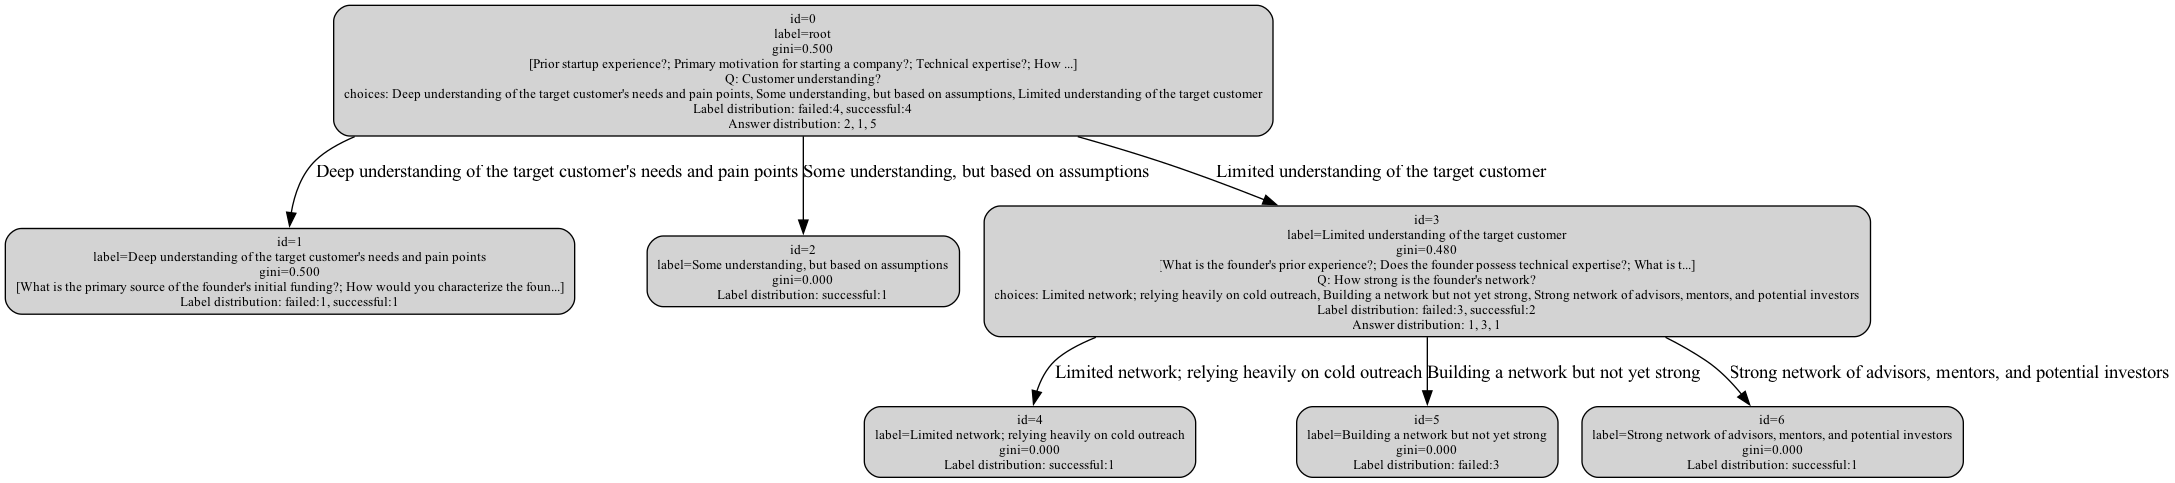

In [51]:
root_id = tree.get_root_id()
if root_id is not None:
    display(Image(tree.view_node(root_id, add_all_questions=True, truncate_length=100)))

In [52]:
# Can set tree.advice after each anext of tree.fit
# tree.advice("")

In [53]:
tree.get_training_data()

,data,dcf35421-a364-4550-998a-8cfa6fbc8a7f,b354795c-8ecd-4915-8b2d-11d618c9b4d6,fdbd25c0-5dfb-4bbd-ab9b-10af8ada69c0,0122b76c-9a39-4735-9f4d-ca888718943b,4c520c18-e627-4e89-8ce7-0417d56663a5,e563bb61-f8ee-4974-814b-2c61ad507af2,4d8c33e2-7a99-4630-b43b-14f56a31fc41,a254d130-24bc-4994-91d5-267258cdf412,b046074a-db4f-4ea8-a2ed-070e3dd72ac6,...,6135b256-392d-4eac-a067-5914df3865ac,92fce9bf-c1c2-48c4-aff5-d3829b40db69,7825f1bc-0a5b-46d4-918f-24f8b058d0ef,07c1dd31-aafa-4309-a94e-a726a90227f3,cc5626da-dfd7-4a69-a98f-020f0fd8415e,77fd1fc0-c86a-4bd2-85e3-a142dfe18baf,b8e88d5d-0dfd-4209-872a-f54c319fdf0a,ffb2e06c-db32-420b-9b15-055d978a9f1a,c0237ee6-7067-4149-9682-3c50783f7641,y
0,A is a 30-year-old woman living in San Francis...,"Some experience at a startup, but not as a fou...",Pursuing an opportunity in a high-growth market,Deep technical expertise relevant to the product,Raised a significant seed round quickly from k...,Building a network but not yet strong,Experience with scaling a product or service,Still ideating or has a prototype with limited...,Solo founder without a strong support network,Limited understanding of the target customer,...,NaN,NaN,NaN,No prior startup experience,Deep technical expertise relevant to the product,Raised a significant seed round quickly from k...,"Strong network of advisors, mentors, and poten...",Still ideating or has a prototype with limited...,Solving a specific problem they personally exp...,successful
1,B is a 25-year-old man based in New York City....,No prior startup experience,Pursuing an opportunity in a high-growth market,No technical expertise,Still bootstrapping or seeking seed funding,Building a network but not yet strong,No experience with scaling,Still ideating or has a prototype with limited...,Solo founder without a strong support network,"Some understanding, but based on assumptions",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
2,C is stay in Los Angeles. He is a practicing m...,No prior startup experience,Solving a specific problem they personally exp...,"Some technical knowledge, relying on external ...",Still bootstrapping or seeking seed funding,Building a network but not yet strong,No experience with scaling,Still ideating or has a prototype with limited...,Solo founder without a strong support network,Limited understanding of the target customer,...,NaN,NaN,NaN,No prior startup experience,"Some technical knowledge, relying on external ...",Still bootstrapping or seeking seed funding,Building a network but not yet strong,Still ideating or has a prototype with limited...,Solving a specific problem they personally exp...,failed
3,D is a 40-year-old man living in Chicago. He s...,No prior startup experience,Pursuing an opportunity in a high-growth market,No technical expertise,Still bootstrapping or seeking seed funding,Limited network; relying heavily on cold outreach,No experience with scaling,Still ideating or has a prototype with limited...,Solo founder without a strong support network,Limited understanding of the target customer,...,NaN,NaN,NaN,No prior startup experience,No technical expertise,Still bootstrapping or seeking seed funding,Limited network; relying heavily on cold outreach,Still ideating or has a prototype with limited...,Limited understanding of the target customer,successful
4,E is a 28-year-old woman in San Francisco. She...,"Some experience at a startup, but not as a fou...",Solving a specific problem they personally exp...,Deep technical expertise relevant to the product,Still bootstrapping or seeking seed funding,Building a network but not yet strong,Experience with scaling a product or service,Early pilot customers with some traction,Solo founder without a strong support network,Deep understanding of the target customer's ne...,...,Bootstrapped with personal savings or revenue,Deep technical expertise relevant to the product,Early pilot customers with some traction,NaN,NaN,NaN,NaN,NaN,NaN,failed
5,F is a 32-year-old man based in New York City....,

In [54]:
tree.get_questions()

,node_id,value,choices,question_type,df_column,score
0,0,Prior startup experience?,[Extensive experience as a founder or early em...,INFERENCE,dcf35421-a364-4550-998a-8cfa6fbc8a7f,NaN
1,0,Primary motivation for starting a company?,[Solving a specific problem they personally ex...,INFERENCE,b354795c-8ecd-4915-8b2d-11d618c9b4d6,NaN
2,0,Technical expertise?,[Deep technical expertise relevant to the prod...,INFERENCE,fdbd25c0-5dfb-4bbd-ab9b-10af8ada69c0,0.500000
3,0,How quickly did they raise seed funding?,[Raised a significant seed round quickly from ...,INFERENCE,0122b76c-9a39-4735-9f4d-ca888718943b,NaN
4,0,Network within the target industry?,"[Established network with potential customers,...",INFERENCE,4c520c18-e627-4e89-8ce7-0417d56663a5,0.333333
5,0,Experience with scaling?,"[Experience with scaling a product or service,...",INFERENCE,e563bb61-f8ee-4974-814b-2c61ad507af2,NaN
6,0,Stage of the company?,[Actively has paying customers and a scalable ...,INFERENCE,4d8c33e2-7a99-4630-b43b-14f56a31fc41,NaN
7,0,Team composition?,[Founding team with complementary skills and r...,INFERENCE,a254d130-24bc-4994-91d5-267258cdf412,NaN
8,0,Customer understanding?,[Deep understanding of the target customer's n...,INFERENCE,b046074a-db4f-4ea8-a2ed-070e3dd72ac6,0.425000
9,0,Adaptability and market awareness?,[Demonstrates ability to pivot based on market...,INFERENCE,b35f7cf5-39e1-4109-bb8b-062574d9c1df,NaN


In [55]:
from typing import Any, Tuple

predictions: list[Tuple[Any, str, str, int]] = []
async for pred in tree.predict(X):
    predictions.append(pred)
    print(pred)
    # Sample index, question, answer, node_id, token_usage

(3, 'Customer understanding?', 'Some understanding, but based on assumptions', 0, TokenCounter(token_counts={'google/gemini-2.0-flash-lite': TokenCount(provider='google', model='gemini-2.0-flash-lite', number_of_calls=1, value=256, is_min_estimate=False, callers={'GPTree._answer_question_for_row': 1})}, _lock=<asyncio.locks.Lock object at 0x11821bf50 [unlocked]>))
(3, 'No Question', 'No Answer', 2, TokenCounter(token_counts={'google/gemini-2.0-flash-lite': TokenCount(provider='google', model='gemini-2.0-flash-lite', number_of_calls=1, value=256, is_min_estimate=False, callers={'GPTree._answer_question_for_row': 1})}, _lock=<asyncio.locks.Lock object at 0x11821bf50 [unlocked]>))
(2, 'Customer understanding?', 'Some understanding, but based on assumptions', 0, TokenCounter(token_counts={'google/gemini-2.0-flash-lite': TokenCount(provider='google', model='gemini-2.0-flash-lite', number_of_calls=2, value=493, is_min_estimate=False, callers={'GPTree._answer_question_for_row': 2})}, _lock=<a

In [56]:
tree.classes

[np.str_('failed'), np.str_('successful')]

# Prunning

In [57]:
tree.prune_tree(3)

I0000 00:00:1758625793.714486 9245322 fork_posix.cc:71] Other threads are currently calling into gRPC, skipping fork() handlers


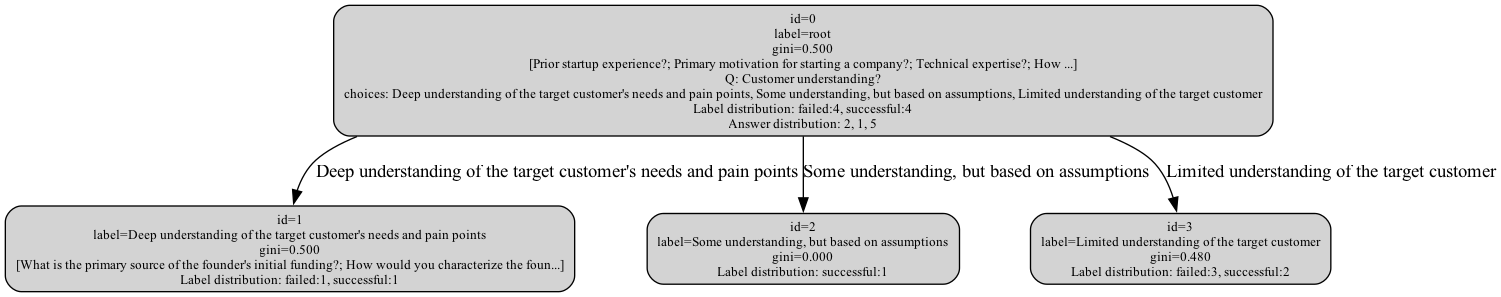

In [58]:
root_id = tree.get_root_id()
if root_id is not None:
    display(Image(tree.view_node(root_id, add_all_questions=True, truncate_length=100)))

# Re fit

In [59]:
fitter = tree.resume_fit(3)

In [66]:
tree.advice("Please shift your focus to the location of the founders.")

'Advice taken'

In [ ]:
# You'll need to run this cell multiple times
root = await anext(fitter)

I0000 00:00:1758625976.754089 9245322 fork_posix.cc:71] Other threads are currently calling into gRPC, skipping fork() handlers


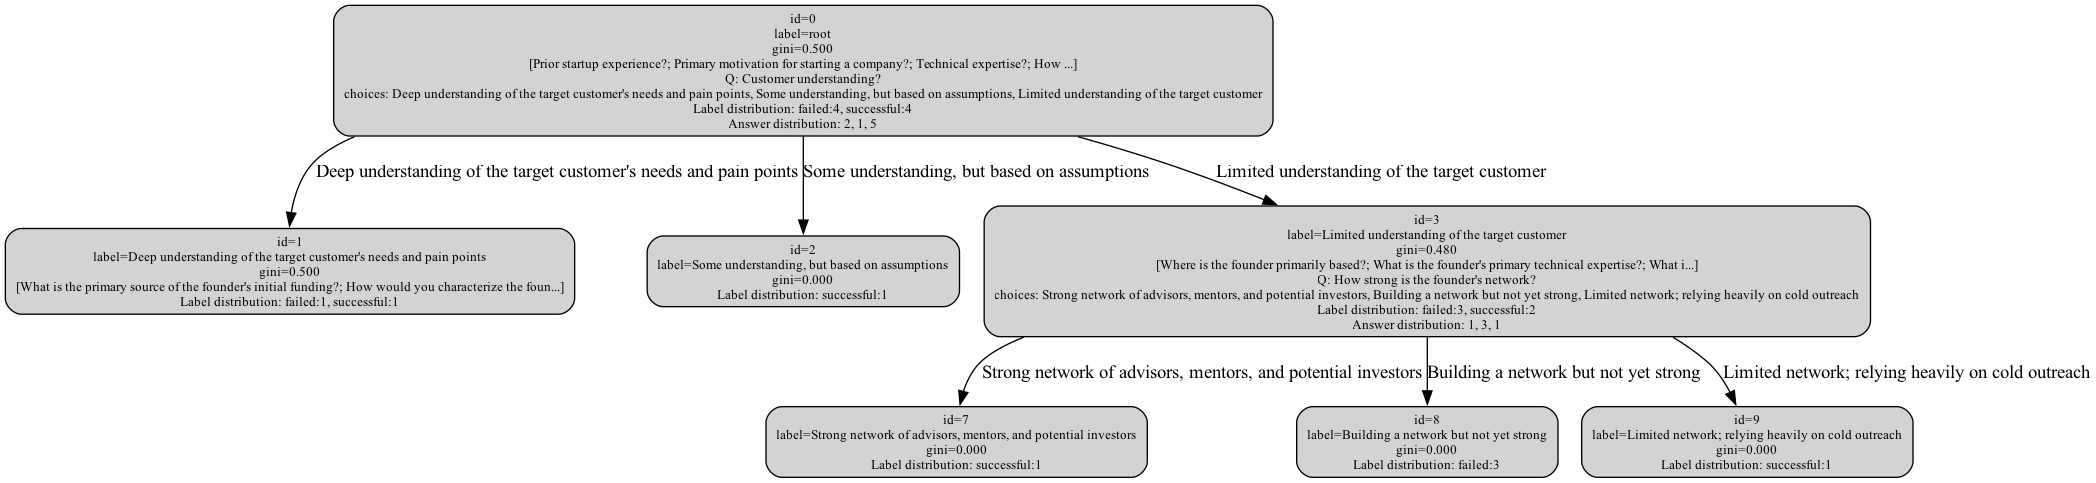

In [72]:
root_id = tree.get_root_id()
if root_id is not None:
    display(Image(tree.view_node(root_id, add_all_questions=True, truncate_length=100)))

# NOTE: set of questions in node 3 added location.

# Saving the tree

In [73]:
tree.save("example_gptree", for_production=True)

# Loading the tree

In [74]:
loaded_tree = GPTree.load("example_gptree")

In [75]:
predictions: list[Tuple[Any, str, str, int]] = []
async for pred in loaded_tree.predict(X):
    predictions.append(pred)
    print(pred)
    # Sample index, question, answer, node_id, token_usage

(0, 'Customer understanding?', 'Some understanding, but based on assumptions', 0, TokenCounter(token_counts={'google/gemini-2.0-flash-lite': TokenCount(provider='google', model='gemini-2.0-flash-lite', number_of_calls=1, value=260, is_min_estimate=False, callers={'GPTree._answer_question_for_row': 1})}, _lock=<asyncio.locks.Lock object at 0x11864dc50 [unlocked]>))
(0, 'No Question', 'No Answer', 2, TokenCounter(token_counts={'google/gemini-2.0-flash-lite': TokenCount(provider='google', model='gemini-2.0-flash-lite', number_of_calls=1, value=260, is_min_estimate=False, callers={'GPTree._answer_question_for_row': 1})}, _lock=<asyncio.locks.Lock object at 0x11864dc50 [unlocked]>))
(1, 'Customer understanding?', 'Limited understanding of the target customer', 0, TokenCounter(token_counts={'google/gemini-2.0-flash-lite': TokenCount(provider='google', model='gemini-2.0-flash-lite', number_of_calls=2, value=512, is_min_estimate=False, callers={'GPTree._answer_question_for_row': 2})}, _lock=<a